In [1]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks


In [ ]:
#load the saved model
#loaded_model = joblib.load('logreg_model.pkl')
##baseline saved as log_reg_smote_baseline.pkl

In [2]:
#import the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import f1_score, precision_recall_curve, auc
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from scipy.stats import randint
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

In [ ]:
#learning curve function f1
def plot_learning_curve(model, X, y, scoring, train_sizes):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring=scoring, train_sizes=train_sizes
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(train_sizes, train_scores_mean, "o-", color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()


In [3]:
#set random seed
np.random.seed(42)

In [ ]:
#change the working directory to a different path
#os.chdir(r'C:\Users\madal\Desktop\MSc-Data-Science\Thesis')

In [5]:
#LR SMOTE import - validation and test are always those!

#X_train_resampled = pd.read_csv('X_train_transformed_smote.csv')
X_valid_transformed = pd.read_csv('X_valid_transformed_basicfull.csv')
X_test_transformed = pd.read_csv('X_test_transformed_basicfull.csv')

#y_train_resampled = pd.read_csv('y_train_smote.csv')
y_valid = pd.read_csv('y_valid_basicfull.csv')
y_test = pd.read_csv('y_test_basicfull.csv')
#y_train_resampled = np.ravel(y_train_resampled.values)
y_valid = np.ravel(y_valid.values)
y_test = np.ravel(y_test.values)

In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_resampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")


Number of features is the same in training and validation sets.


In [ ]:
logistic_regression = LogisticRegression(warm_start=True, max_iter=1000)

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a random search object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=3, scoring='f1_macro', n_iter=5, random_state=42, verbose=2
)


# Fit the random search to your data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR SMOTE:", best_params)

# Create a logistic regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)

# Fit the model to the training data
best_logistic_regression.fit(X_train_resampled, y_train_resampled)

# Make predictions on the validation data
y_pred = best_logistic_regression.predict(X_valid_transformed)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 6.9min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 3.5min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 5.5min
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  26.8s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  27.4s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  27.0s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time= 3.5min
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time= 5.1min
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time= 3.6min
[CV] END .................C=10, penalty=l2, solver=liblinear; total time= 1.3min
[CV] END .................C=10, penalty=l2, solver=liblinear; total time= 1.4min
[CV] END .................C=10, penalty=l2, solve

In [ ]:
#save model to a file
joblib.dump(best_logistic_regression, 'log_reg_smote_baseline.pkl')

['log_reg_smote_baseline.pkl']

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.4909


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8920


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[130030  28294]
 [   409   1267]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    158324
           1       0.04      0.76      0.08      1676

    accuracy                           0.82    160000
   macro avg       0.52      0.79      0.49    160000
weighted avg       0.99      0.82      0.89    160000



In [ ]:
average_precision = average_precision_score(y_valid, y_pred)

print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0350


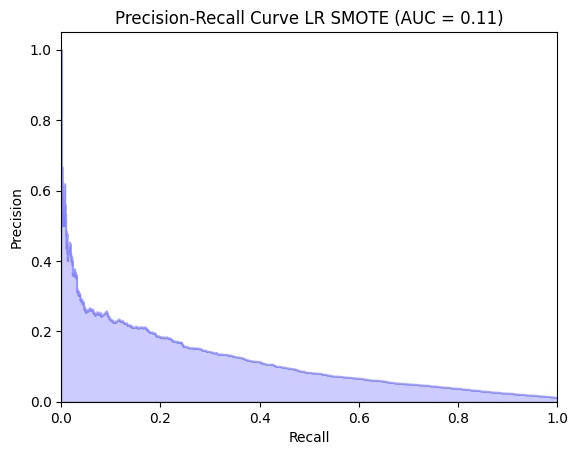

Area Under the Curve LR SMOTE (AUC): 0.114560


In [ ]:
precision, recall, _ = precision_recall_curve(y_valid, best_logistic_regression.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve LR SMOTE (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve LR SMOTE (AUC): {auc_score:.6f}")

In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")


Class 0: F1 Score = 0.90
Class 1: F1 Score = 0.08
Class accuracy: F1 Score = 0.82
Class macro: F1 Score = 0.49
Class weighted: F1 Score = 0.89


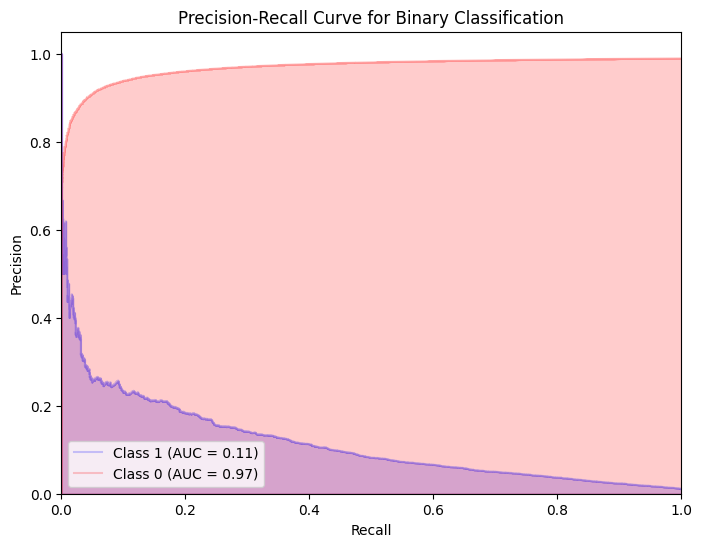

AUC Class 1: 0.1146
AUC Class 0: 0.9690


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_logistic_regression.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_logistic_regression.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

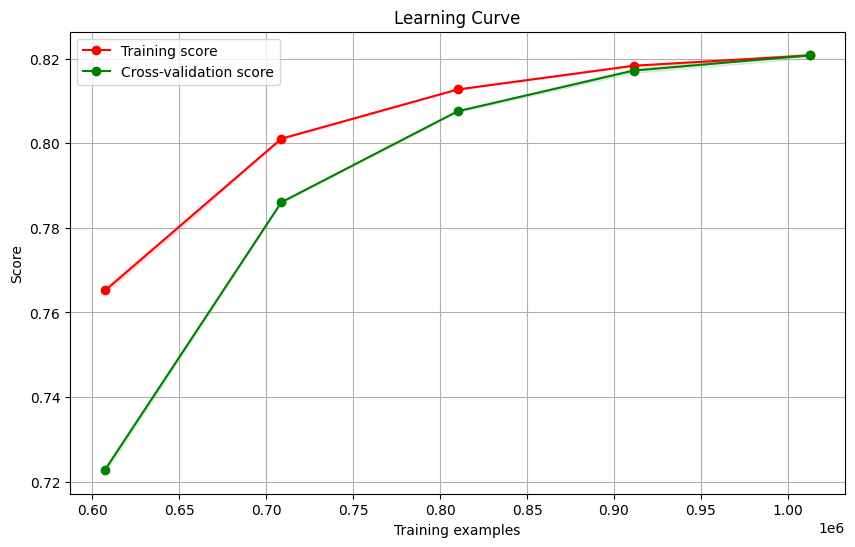

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
##custom scorer
from sklearn.metrics import recall_score
#obtain predicted probabilities for the positive class from the model
y_prob = best_logistic_regression.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)

Chosen threshold: 0.9972450606726716
False Positive Rate: 0.0
Recall: 0.0005966587112171838
[[158324      0]
 [  1675      1]]


In [ ]:
import pickle

with open('logreg_smote.pkl', 'wb') as file:
    pickle.dump(best_logistic_regression, file)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-41-60e155e9155a>", line 3, in <cell line: 3>
    with open('logreg_smote.pkl', 'wb') as file:
OSError: [Errno 107] Transport endpoint is not connected: 'logreg_smote.pkl'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  Fil

In [ ]:
##logistic regression with ADASYN 2/7
X_train_resampled = pd.read_csv('X_train_transformed_adasyn.csv')

y_train_resampled = pd.read_csv('y_train_adasyn.csv')

y_train_resampled = np.ravel(y_train_resampled.values)


In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_resampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")


Number of features is the same in training and validation sets.


In [ ]:
logistic_regression = LogisticRegression(warm_start=True, max_iter=1000)

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a GridSearchCV object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=3, scoring='f1_macro', n_iter=5, random_state=42, verbose=2
)

# Fit the random search to your data
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR ADASYN:", best_params)

# Create a logistic regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)

# Fit the model to the training data
best_logistic_regression.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred = best_logistic_regression.predict(X_valid_transformed)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 9.3min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 5.7min
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time= 6.8min
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  33.7s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  33.2s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  37.2s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time= 4.3min
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time= 3.5min
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time= 3.0min
[CV] END .................C=10, penalty=l2, solver=liblinear; total time= 1.7min
[CV] END .................C=10, penalty=l2, solver=liblinear; total time= 1.4min
[CV] END .................C=10, penalty=l2, solve

In [ ]:
##adasyn baseline model
#save model to a file
joblib.dump(best_logistic_regression, 'log_reg_adasyn_baseline.pkl')

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-32-7c0777a2903c>", line 3, in <cell line: 3>
    joblib.dump(best_logistic_regression, 'log_reg_adasyn_baseline.pkl')
  File "/usr/local/lib/python3.10/dist-packages/joblib/numpy_pickle.py", line 552, in dump
    with open(filename, 'wb') as f:
OSError: [Errno 107] Transport endpoint is not connected: 'log_reg_adasyn_baseline.pkl'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/l

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[129046  29278]
 [   400   1276]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    158324
           1       0.04      0.76      0.08      1676

    accuracy                           0.81    160000
   macro avg       0.52      0.79      0.49    160000
weighted avg       0.99      0.81      0.89    160000



In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4880


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8883


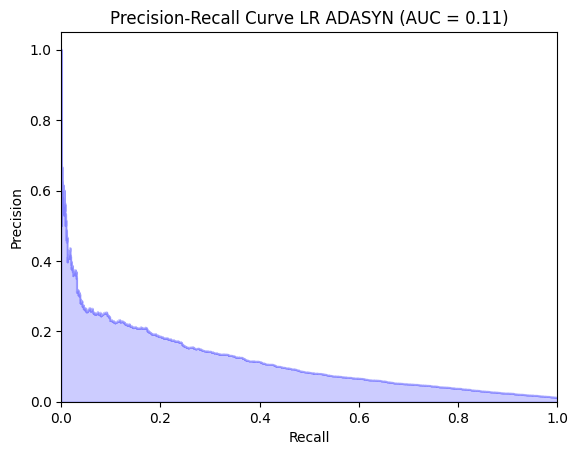

Area Under the Curve LR ADASYN (AUC): 0.1142


In [ ]:
precision, recall, _ = precision_recall_curve(y_valid, best_logistic_regression.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve LR ADASYN (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve LR ADASYN (AUC): {auc_score:.4f}")

In [ ]:
average_precision = average_precision_score(y_valid, y_pred)

print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0343


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.90
Class 1: F1 Score = 0.08
Class accuracy: F1 Score = 0.81
Class macro: F1 Score = 0.49
Class weighted: F1 Score = 0.89


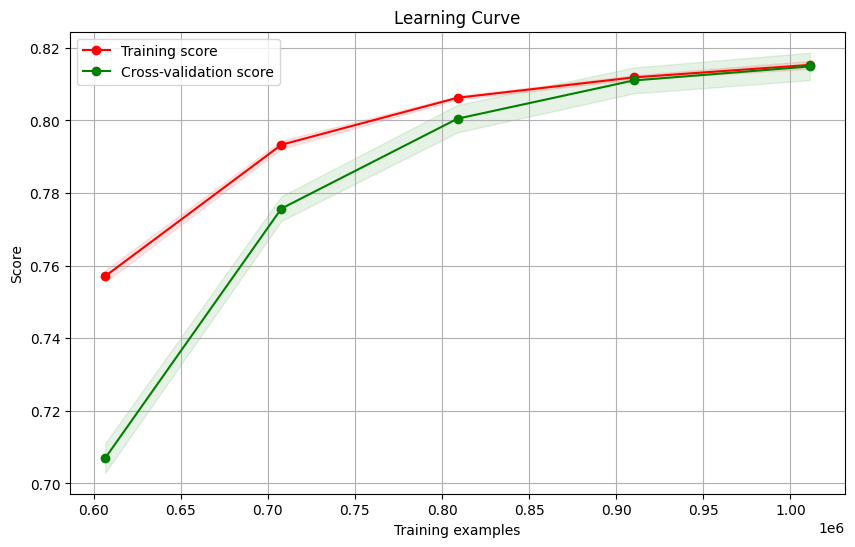

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression, X_train_resampled, y_train_resampled, scoring, train_sizes)

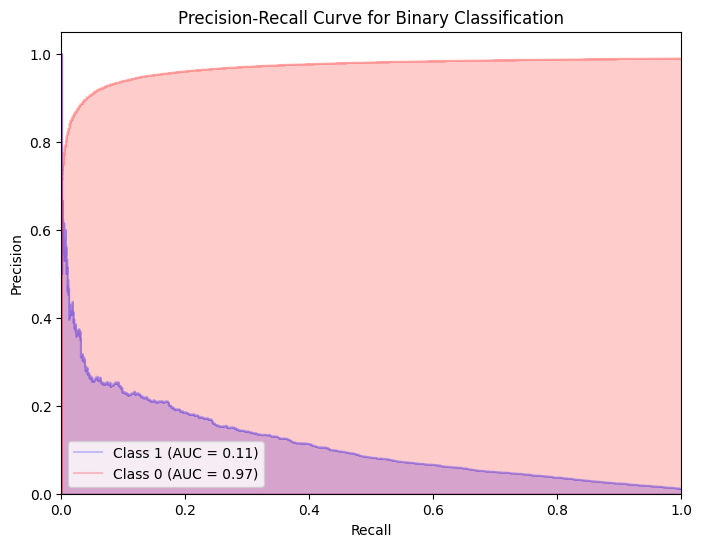

AUC Class 1: 0.1142
AUC Class 0: 0.9690


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_logistic_regression.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_logistic_regression.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

In [ ]:
##custom scorer
from sklearn.metrics import recall_score
#obtain predicted probabilities for the positive class from the model
y_prob = best_logistic_regression.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



Chosen threshold: 0.9970644649557144
False Positive Rate: 0.0
Recall: 0.0005966587112171838
[[158324      0]
 [  1675      1]]


In [ ]:
##LR random undersampling
X_train_undersampled = pd.read_csv('X_train_random_undersampl.csv')

y_train_undersampled = pd.read_csv('y_train_random_undersampl.csv')

y_train_undersampled = np.ravel(y_train_undersampled.values)



In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_undersampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:
logistic_regression = LogisticRegression(warm_start=True, max_iter=1000)

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a random search object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=3, scoring='f1_macro', n_iter=5, random_state=42, verbose=2
)


# Fit the random search to your data
random_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR random undersampling:", best_params)

# Create a logistic regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)

# Fit the model to the training data
best_logistic_regression.fit(X_train_undersampled, y_train_undersampled)

# Make predictions on the validation data
y_pred = best_logistic_regression.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_logistic_regression, 'log_reg_rand_undersampling.pkl')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   1.0s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   1.3s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   3.1s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   3.9s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   2.3s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END .................C=10, penalty=l2, solve

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


['log_reg_rand_undersampling.pkl']

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4829


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8808


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[127076  31248]
 [   369   1307]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    158324
           1       0.04      0.78      0.08      1676

    accuracy                           0.80    160000
   macro avg       0.52      0.79      0.48    160000
weighted avg       0.99      0.80      0.88    160000



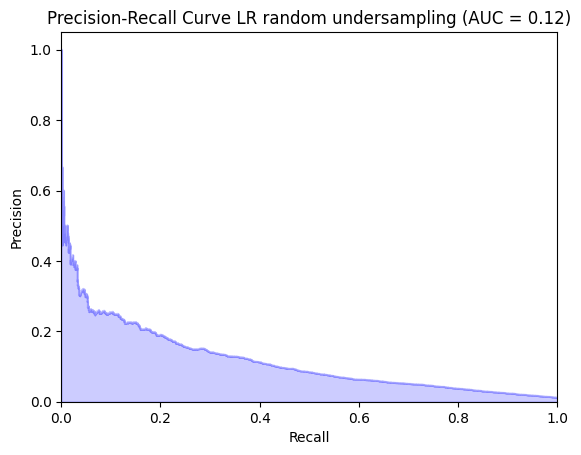

Area Under the Curve LR random undersampling (AUC): 0.1162


In [ ]:
precision, recall, _ = precision_recall_curve(y_valid, best_logistic_regression.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve LR random undersampling (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve LR random undersampling (AUC): {auc_score:.4f}")

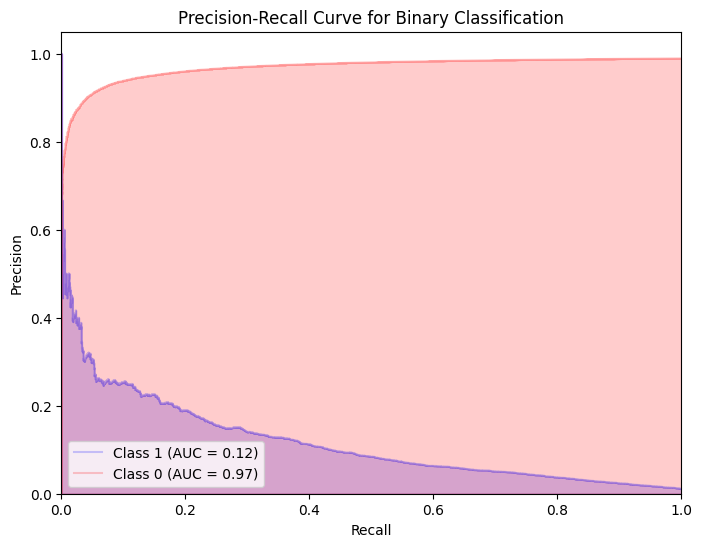

AUC Class 1: 0.1162
AUC Class 0: 0.9689


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_logistic_regression.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_logistic_regression.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

In [ ]:
average_precision = average_precision_score(y_valid, y_pred)

print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0336


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.89
Class 1: F1 Score = 0.08
Class accuracy: F1 Score = 0.80
Class macro: F1 Score = 0.48
Class weighted: F1 Score = 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

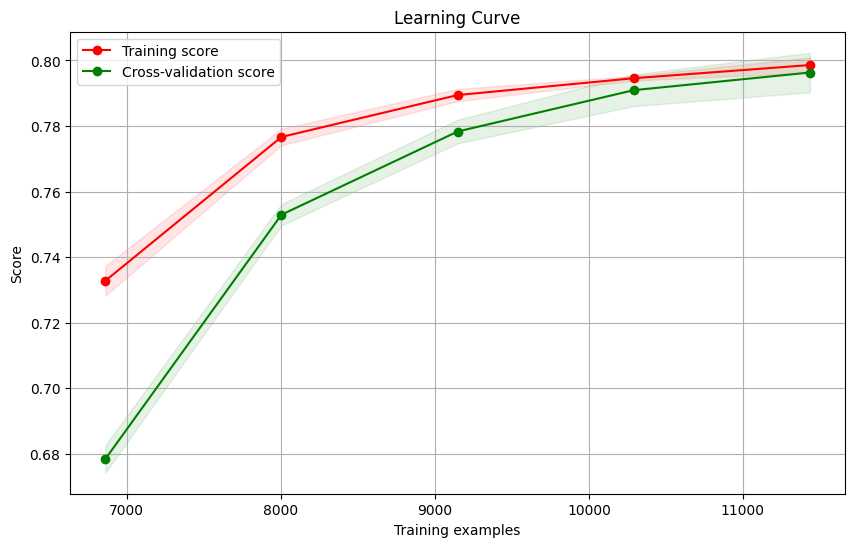

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression, X_train_undersampled, y_train_undersampled, scoring, train_sizes)

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_logistic_regression.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)

Chosen threshold: 0.9961227907355574
False Positive Rate: 0.0
Recall: 0.0005966587112171838
[[158324      0]
 [  1675      1]]


In [ ]:
##LR stratified undersampling

In [ ]:
##import data
X_train_undersampled = pd.read_csv('X_train_undersampled_str.csv')

y_train_undersampled = pd.read_csv('y_train_undersampled_str.csv')

y_train_undersampled = np.ravel(y_train_undersampled.values)



In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_undersampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:
logistic_regression = LogisticRegression(warm_start=True, max_iter=1000)

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Create a random search object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=3, scoring='f1_macro', n_iter=5, random_state=42, verbose=2
)


# Fit the random search to your data
random_search.fit(X_train_undersampled, y_train_undersampled)

# Get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR stratified undersampling:", best_params)

# Create a logistic regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)

# Fit the model to the training data
best_logistic_regression.fit(X_train_undersampled, y_train_undersampled)

# Make predictions on the validation data
y_pred = best_logistic_regression.predict(X_valid_transformed)

#save model to a file
joblib.dump(best_logistic_regression, 'log_reg_strat_undersampling.pkl')

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END ................C=0.1, penalty=l1, solver=liblinear; total time=   1.1s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   2.3s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   1.2s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   1.8s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ..............C=0.001, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.5s
[CV] END .................C=10, penalty=l2, solve

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


['log_reg_strat_undersampling.pkl']

In [ ]:
f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.4419


In [ ]:
f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8184


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[111671  46653]
 [   251   1425]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83    158324
           1       0.03      0.85      0.06      1676

    accuracy                           0.71    160000
   macro avg       0.51      0.78      0.44    160000
weighted avg       0.99      0.71      0.82    160000



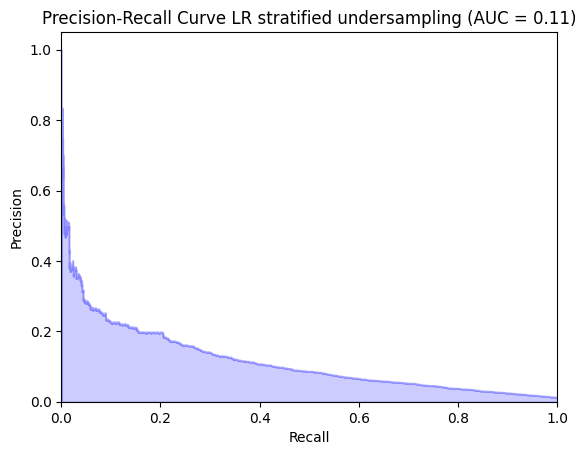

Area Under the Curve LR stratified undersampling (AUC): 0.114563


In [ ]:
precision, recall, _ = precision_recall_curve(y_valid, best_logistic_regression.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve LR stratified undersampling (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve LR stratified undersampling (AUC): {auc_score:.6f}")

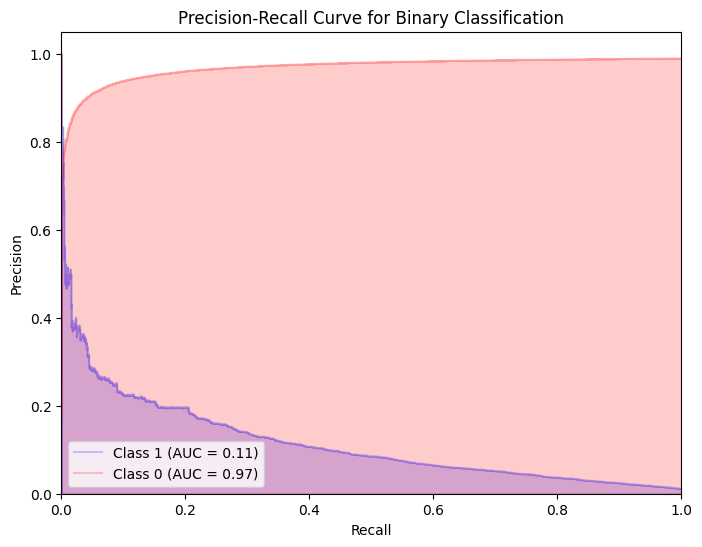

AUC Class 1: 0.1146
AUC Class 0: 0.9690


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_logistic_regression.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_logistic_regression.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

In [ ]:
average_precision = average_precision_score(y_valid, y_pred)
print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0268


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.83
Class 1: F1 Score = 0.06
Class accuracy: F1 Score = 0.71
Class macro: F1 Score = 0.44
Class weighted: F1 Score = 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

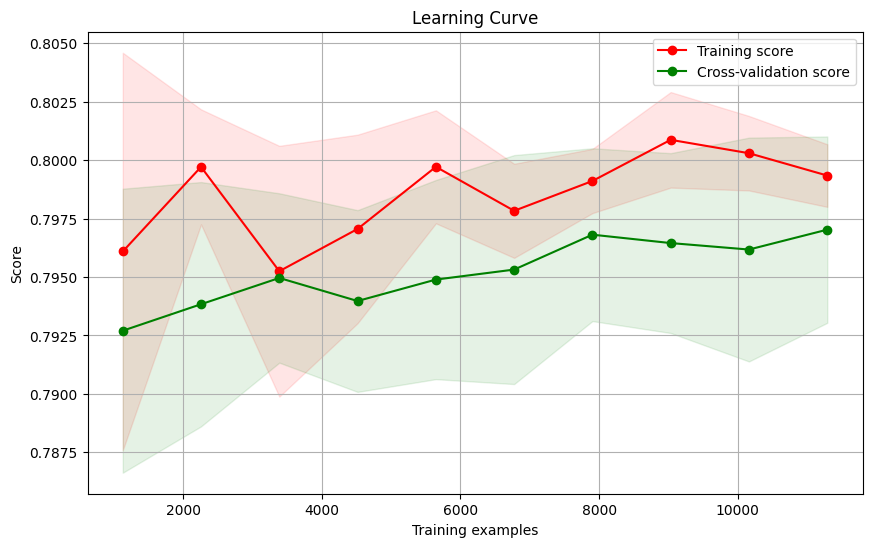

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression, X_train_undersampled, y_train_undersampled, scoring, train_sizes)

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_logistic_regression.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)

Chosen threshold: 0.9982623309729176
False Positive Rate: 6.316161794800536e-06
Recall: 0.0
[[158323      1]
 [  1676      0]]


In [ ]:
########################from here - still to be worked~~~!!!!

In [6]:
##no resampling + class weights
X_train = pd.read_csv('X_train_transformed_basicfull.csv')
y_train = pd.read_csv('y_train_basicfull.csv')

y_train = np.ravel(y_train.values)

In [ ]:
class_distribution_ytrain = np.bincount(y_train)

# Print the class distribution
for class_label, count in enumerate(class_distribution_ytrain):
    print(f"Class {class_label}: {count} samples")

Class 0: 632853 samples
Class 1: 7147 samples


In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:

#calc the weight for the positive class
#inv of the proportion of positive cases in the dataset
weight_positive = 1 / 0.011  # 1/0.011 = 90.91

#set the class weights
class_weights = {0: 1, 1: weight_positive}
logistic_regression = LogisticRegression(class_weight=class_weights, max_iter=1000, warm_start=True)

#hyperparameters and their possible values
param_grid = {
    'penalty': ['l2', 'l1'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

#RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=3, scoring='f1', n_iter=5, verbose=2, random_state=42
)

#fit the random search to the data
random_search.fit(X_train, y_train)

#get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR SMOTE w/ class weights:", best_params)

#create a logistic regression model with the best hyperparameters
best_logistic_regression_cw = LogisticRegression(**best_params)

#fit the model to the training data
best_logistic_regression_cw.fit(X_train, y_train)

#predictions on the test data
y_pred_cw = best_logistic_regression_cw.predict(X_valid_transformed)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  51.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  51.2s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  46.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time= 1.1min
[CV] END .................C=10, penalty=l2, solver=liblinear; total time= 1.2min
[CV] END .................C=10, penalty=l2, solver=liblinear; total time= 1.2min
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=  23.8s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=  24.6s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=  24.3s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=73.2min
[CV] END ................C=10, penalty=l1, solver=liblinear; total time=101.8min
[CV] END ................C=10, penalty=l1, solver

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=23.3min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=23.3min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=23.8min
Best Hyperparameters LR SMOTE w/ class weights: {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}


In [7]:
logreg_model = LogisticRegression(solver='liblinear', penalty='l2', C=10)

logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_valid_transformed)

In [8]:
#save model to a file
joblib.dump(logreg_model, 'log_reg_class_weights.pkl')

['log_reg_class_weights.pkl']

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_cw))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred_cw))

Confusion Matrix:
[[158310     14]
 [  1657     19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    158324
           1       0.58      0.01      0.02      1676

    accuracy                           0.99    160000
   macro avg       0.78      0.51      0.51    160000
weighted avg       0.99      0.99      0.98    160000



In [ ]:
f1 = f1_score(y_valid, y_pred_cw, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.5085


In [ ]:
f1 = f1_score(y_valid, y_pred_cw, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9846


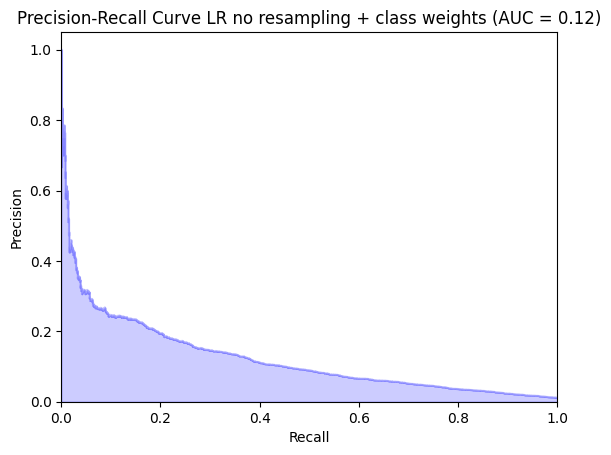

Area Under the Curve LR no resampling + class weights (AUC): 0.1225


In [ ]:
precision, recall, _ = precision_recall_curve(y_valid, best_logistic_regression_cw.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve LR no resampling + class weights (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve LR no resampling + class weights (AUC): {auc_score:.4f}")

In [ ]:
average_precision = average_precision_score(y_valid, y_pred_cw)

print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0169


In [ ]:
class_report = classification_report(y_valid, y_pred_cw)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.99
Class 1: F1 Score = 0.02
Class accuracy: F1 Score = 0.99
Class macro: F1 Score = 0.51
Class weighted: F1 Score = 0.98


In [ ]:
#save model to a file
joblib.dump(best_logistic_regression_cw, 'log_reg_class_weights.pkl')

In [ ]:
#learning curve
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression_cw, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_model.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-1d935266ce9b>", line 22, in <cell line: 22>
    recall = recall_score(y_valid, y_pred)
NameError: name 'recall_score' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python3.10/dist

In [ ]:
##LR best sampling with with class weights - random undersampling
##LR random undersampling
X_train_undersampled = pd.read_csv('X_train_random_undersampl.csv')

y_train_undersampled = pd.read_csv('y_train_random_undersampl.csv')

y_train_undersampled = np.ravel(y_train_undersampled.values)

In [ ]:
#calc the weight for the positive class
#inv of the proportion of positive cases in the dataset
weight_positive = 1 / 0.011  # 1/0.011 = 90.91

#set the class weights
class_weights = {0: 1, 1: weight_positive}
logistic_regression = LogisticRegression(class_weight=class_weights, max_iter=1000, warm_start=True)

#hyperparameters and their possible values
param_grid = {
    'penalty': ['l2', 'l1'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

#RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=3, scoring='f1_macro', n_iter=5, verbose=2, random_state=42
)

#fit the random search to the data
random_search.fit(X_train_undersampled, y_train_undersampled)

#get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR random undersampling w/ class weights:", best_params)

#create a logistic regression model with the best hyperparameters
best_logistic_regression_cw = LogisticRegression(**best_params)

#fit the model to the training data
best_logistic_regression_cw.fit(X_train_undersampled, y_train_undersampled)

#predictions on the test data
y_pred_cw = best_logistic_regression_cw.predict(X_valid_transformed)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.2s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   0.2s
[CV] END .................C=10, penalty=l1, solve

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=  27.1s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=  26.7s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=  26.8s


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters LR random undersampling w/ class weights: {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#save model to a file
joblib.dump(best_logistic_regression_cw, 'logreg_class_weights_randomundersampling.pkl')

['logreg_class_weights_randomundersampling.pkl']

In [ ]:
f1 = f1_score(y_valid, y_pred_cw, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4829


In [ ]:
f1 = f1_score(y_valid, y_pred_cw, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.8811


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_cw))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred_cw))

Confusion Matrix:
[[127135  31189]
 [   374   1302]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    158324
           1       0.04      0.78      0.08      1676

    accuracy                           0.80    160000
   macro avg       0.52      0.79      0.48    160000
weighted avg       0.99      0.80      0.88    160000



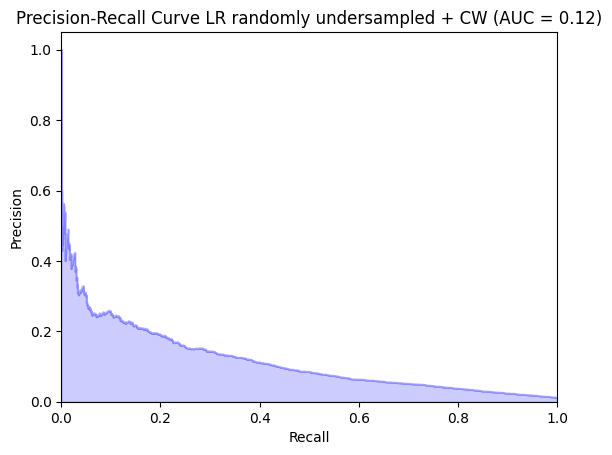

Area Under the Curve LR randomly undersampled + CW (AUC): 0.1154


In [ ]:
precision, recall, _ = precision_recall_curve(y_valid, best_logistic_regression_cw.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve LR randomly undersampled + CW (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve LR randomly undersampled + CW (AUC): {auc_score:.4f}")

In [ ]:
average_precision = average_precision_score(y_valid, y_pred_cw)
print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0335


In [ ]:
class_report = classification_report(y_valid, y_pred_cw)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.89
Class 1: F1 Score = 0.08
Class accuracy: F1 Score = 0.80
Class macro: F1 Score = 0.48
Class weighted: F1 Score = 0.88


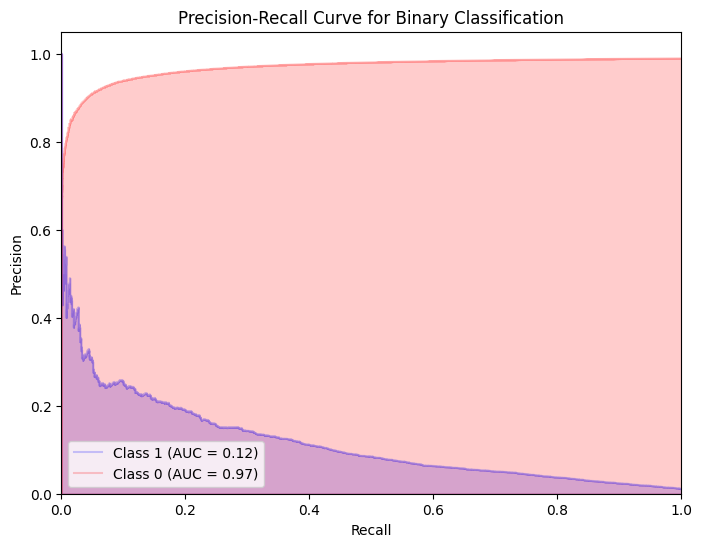

AUC Class 1: 0.1154
AUC Class 0: 0.9689


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_logistic_regression_cw.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_logistic_regression_cw.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

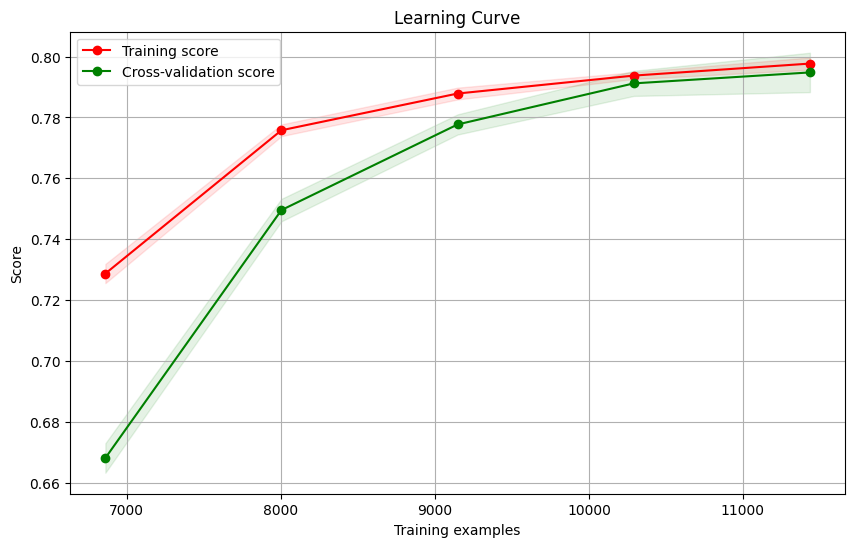

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression_cw, X_train_undersampled, y_train_undersampled, scoring, train_sizes)

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_logistic_regression_cw.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred_cw = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred_cw)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred_cw)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



Chosen threshold: 0.9954700795686313
False Positive Rate: 0.0
Recall: 0.0005966587112171838
[[158324      0]
 [  1675      1]]


In [ ]:
##SMOTE & class weights - import data

X_train_resampled = pd.read_csv('X_train_transformed_smote.csv')
X_valid_transformed = pd.read_csv('X_valid_transformed_basicfull.csv')
X_test_transformed = pd.read_csv('X_test_transformed_basicfull.csv')

y_train_resampled = pd.read_csv('y_train_smote.csv')
y_valid = pd.read_csv('y_valid_basicfull.csv')
y_test = pd.read_csv('y_test_basicfull.csv')
y_train_resampled = np.ravel(y_train_resampled.values)
y_valid = np.ravel(y_valid.values)
y_test = np.ravel(y_test.values)

In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_resampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:
#calc the weight for the positive class
#inv of the proportion of positive cases in the dataset
weight_positive = 1 / 0.011  # 1/0.011 = 90.91

#set the class weights
class_weights = {0: 1, 1: weight_positive}
logistic_regression = LogisticRegression(class_weight=class_weights, max_iter=1000, warm_start=True)

#hyperparameters and their possible values
param_grid = {
    'penalty': ['l2', 'l1'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

#RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=3, scoring='f1_macro', n_iter=5, verbose=2, random_state=42
)

#fit the random search to the data
random_search.fit(X_train_resampled, y_train_resampled)

#get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR random undersampling w/ class weights:", best_params)

#create a logistic regression model with the best hyperparameters
best_logistic_regression_cw = LogisticRegression(**best_params)

#fit the model to the training data
best_logistic_regression_cw.fit(X_train_resampled, y_train_resampled)

#predictions on the test data
y_pred_cw = best_logistic_regression_cw.predict(X_valid_transformed)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  19.3s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  18.7s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  19.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=  18.8s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=  18.8s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=  19.1s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=  18.9s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=  19.2s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=  19.1s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  10.3s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=  10.6s
[CV] END .................C=10, penalty=l1, solve

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=43.3min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=42.5min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=42.2min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Hyperparameters LR random undersampling w/ class weights: {'solver': 'saga', 'penalty': 'l1', 'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
f1 = f1_score(y_valid, y_pred_cw, average = "macro")
print(f"F1 Score: {f1:.4f}")

f1 = f1_score(y_valid, y_pred_cw, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4909
F1 Score: 0.8920


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_cw))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred_cw))

Confusion Matrix:
[[130029  28295]
 [   409   1267]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90    158324
           1       0.04      0.76      0.08      1676

    accuracy                           0.82    160000
   macro avg       0.52      0.79      0.49    160000
weighted avg       0.99      0.82      0.89    160000



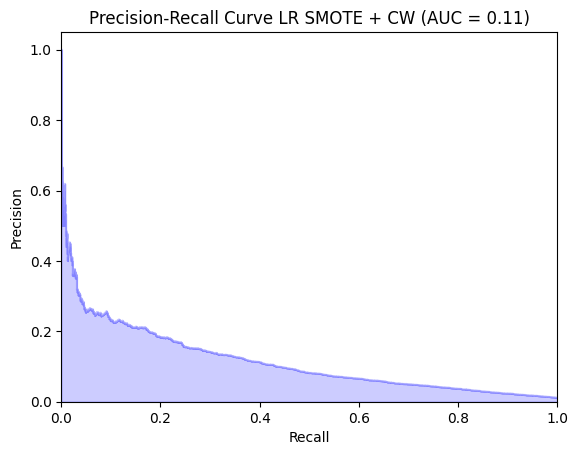

Area Under the Curve LR SMOTE + CW (AUC): 0.1146


In [ ]:
precision, recall, _ = precision_recall_curve(y_valid, best_logistic_regression_cw.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve LR SMOTE + CW (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve LR SMOTE + CW (AUC): {auc_score:.4f}")

In [ ]:
average_precision = average_precision_score(y_valid, y_pred)
print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

Area Under the Precision-Recall Curve (AUC-PR): 0.0268


In [ ]:
average_precision = average_precision_score(y_valid, best_logistic_regression_cw.predict_proba(X_valid_transformed)[:, 1])
print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')


Area Under the Precision-Recall Curve (AUC-PR): 0.1149


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.83
Class 1: F1 Score = 0.06
Class accuracy: F1 Score = 0.71
Class macro: F1 Score = 0.44
Class weighted: F1 Score = 0.82


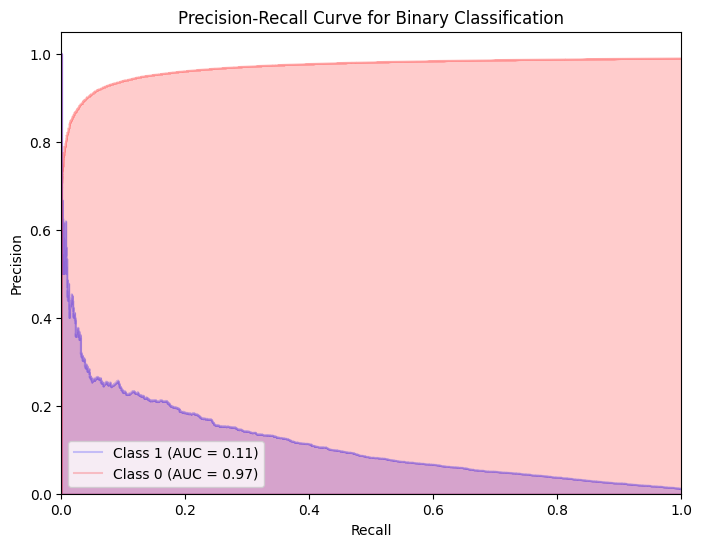

AUC Class 1: 0.1146
AUC Class 0: 0.9690


In [ ]:
# Calculate precision-recall curve for class 1
precision_class1, recall_class1, _ = precision_recall_curve(y_valid, best_logistic_regression_cw.predict_proba(X_valid_transformed)[:, 1])
auc_score_class1 = auc(recall_class1, precision_class1)

# Calculate precision-recall curve for class 0
precision_class0, recall_class0, _ = precision_recall_curve(1 - y_valid, 1 - best_logistic_regression_cw.predict_proba(X_valid_transformed)[:, 0])  # Invert labels for class 0
auc_score_class0 = auc(recall_class0, precision_class0)

# Plot the precision-recall curves
plt.figure(figsize=(8, 6))

# Plot precision-recall curve for class 1
plt.step(recall_class1, precision_class1, color='b', alpha=0.2, where='post', label=f'Class 1 (AUC = {auc_score_class1:.2f})')
plt.fill_between(recall_class1, precision_class1, step='post', alpha=0.2, color='b')

# Plot precision-recall curve for class 0
plt.step(recall_class0, precision_class0, color='r', alpha=0.2, where='post', label=f'Class 0 (AUC = {auc_score_class0:.2f})')
plt.fill_between(recall_class0, precision_class0, step='post', alpha=0.2, color='r')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve for Binary Classification')
plt.legend(loc='lower left')
plt.show()

print(f"AUC Class 1: {auc_score_class1:.4f}")
print(f"AUC Class 0: {auc_score_class0:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

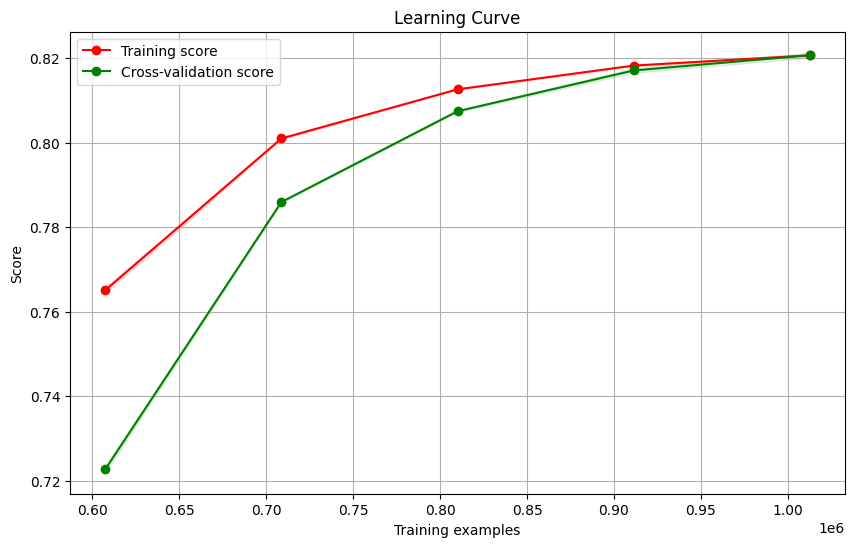

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression_cw, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_logistic_regression_cw.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred_cw = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred_cw)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)



Chosen threshold: 0.9972368743726645
False Positive Rate: 0.0
Recall: 0.8502386634844868
[[158324      0]
 [  1675      1]]


In [ ]:
## best sampling (stratified undersampling) + transactional data
##data import

X_train_resampled = pd.read_csv('X_train_undersampled_str_trans.csv')
X_valid_transformed = pd.read_csv('X_valid_transformed_basic_trans.csv')
X_test_transformed = pd.read_csv('X_test_transformed_basic_trans.csv')

y_train_resampled = pd.read_csv('y_train_undersampled_str_trans.csv')
y_valid = pd.read_csv('y_valid_basic_trans.csv')
y_test = pd.read_csv('y_test_basicfull.csv')
y_train_resampled = np.ravel(y_train_resampled.values)
y_valid = np.ravel(y_valid.values)
y_test = np.ravel(y_test.values)



In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_resampled)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:
##stratified undersampling, only transactional data
logistic_regression = LogisticRegression(max_iter=1000, warm_start=True)

#hyperparameters and their possible values
param_grid = {
    'penalty': ['l2', 'l1'], #'l1'
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'] #'saga'
}

#RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=3, scoring='f1_macro', n_iter=5, verbose=2, random_state=42
)

#fit the random search to the data
random_search.fit(X_train_resampled, y_train_resampled)

#get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR stratified undersampling, TRANS data:", best_params)

#create a logistic regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)

#fit the model to the training data
best_logistic_regression.fit(X_train_resampled, y_train_resampled)

#predictions on the test data
y_pred = best_logistic_regression.predict(X_valid_transformed)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END ................C=100, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   1.7s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   1.7s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=   2.0s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.3s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END .................C=10, penalty=l2, solve

In [ ]:

f1 = f1_score(y_valid, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

f1 = f1_score(y_valid, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4344
F1 Score: 0.8071


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred))

Confusion Matrix:
[[109103  49221]
 [   273   1403]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.69      0.82    158324
           1       0.03      0.84      0.05      1676

    accuracy                           0.69    160000
   macro avg       0.51      0.76      0.43    160000
weighted avg       0.99      0.69      0.81    160000



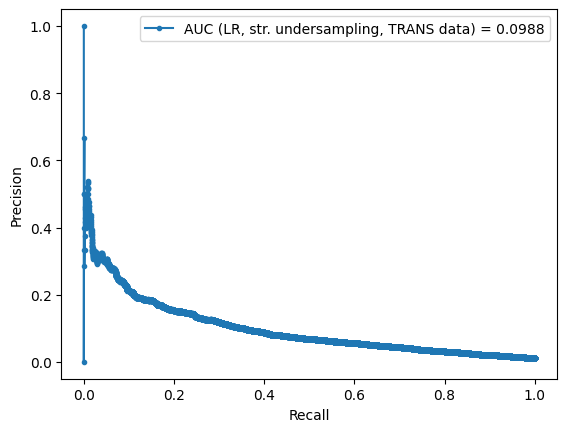

In [ ]:
#from sklearn.metrics import precision_recall_curve, auc
#import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
#y_valid =  y_valid
probabilities = best_logistic_regression.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_lr, recall_lr, _ = precision_recall_curve(y_valid, probabilities)
auc_lr = auc(recall_lr, precision_lr)

# Plot the precision-recall curve

plt.plot(recall_lr, precision_lr, marker=".", label=f"AUC (LR, str. undersampling, TRANS data) = {auc_lr:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")


Class 0: F1 Score = 0.82
Class 1: F1 Score = 0.05
Class accuracy: F1 Score = 0.69
Class macro: F1 Score = 0.43
Class weighted: F1 Score = 0.81


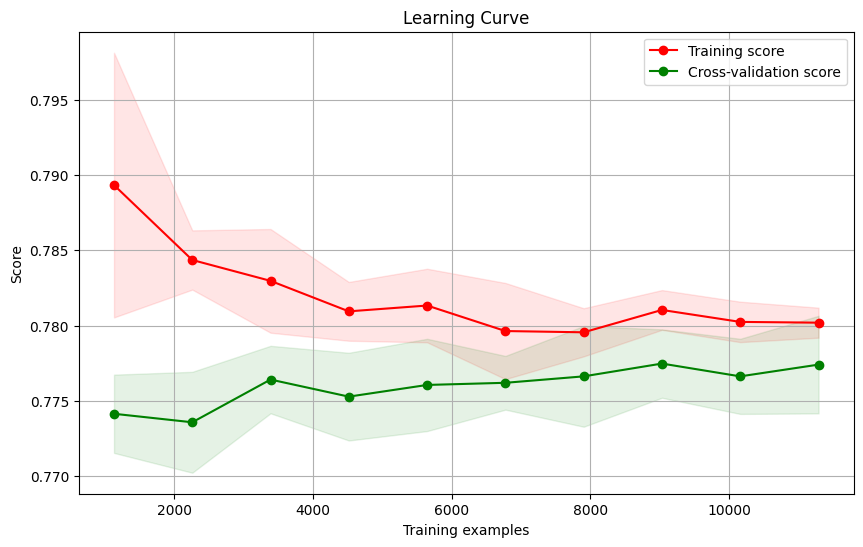

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
#save model to a file
joblib.dump(best_logistic_regression, 'logreg_str_undersampling_trans.pkl')

In [ ]:
##LR best sampling with only TR data - pure + CW


X_train_transformed = pd.read_csv('X_train_transformed_basic_trans.csv')
X_valid_transformed = pd.read_csv('X_valid_transformed_basic_trans.csv')
X_test_transformed = pd.read_csv('X_test_transformed_basic_trans.csv')

y_train_transformed = pd.read_csv('y_train_basic_trans.csv')
y_valid = pd.read_csv('y_valid_basic_trans.csv')
y_test = pd.read_csv('y_test_basic_trans.csv')
y_train_transformed = np.ravel(y_train_transformed.values)
y_valid = np.ravel(y_valid.values)
y_test = np.ravel(y_test.values)

In [ ]:
#convert arrays to pandas df
X_train_df = pd.DataFrame(X_train_transformed)
X_valid_df = pd.DataFrame(X_valid_transformed)

#get the columns/features of each dataset
features_train = set(X_train_df.columns)
features_valid = set(X_valid_df.columns)

#check if the features are the same
if features_train == features_valid:
    print("Number of features is the same in training and validation sets.")
else:
    print("Number of features is different in training and validation sets.")

Number of features is the same in training and validation sets.


In [ ]:
logistic_regression = LogisticRegression(max_iter=1000, warm_start=True)

weight_positive = 1 / 0.011  # 1/0.011 = 90.91

#set the class weights
class_weights = {0: 1, 1: weight_positive}
logistic_regression = LogisticRegression(class_weight=class_weights, max_iter=1000, warm_start=True)

#hyperparameters and their possible values
param_grid = {
    'penalty': ['l2', 'l1'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

#RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=3, scoring='f1', n_iter=5, verbose=2, random_state=42
)

#fit the random search to the data
random_search.fit(X_train_transformed, y_train_transformed)

#get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR w/ class weights (transactional):", best_params)

#create a logistic regression model with the best hyperparameters
best_logistic_regression = LogisticRegression(**best_params)

#fit the model to the training data
best_logistic_regression.fit(X_train_transformed, y_train_transformed)

#predictions on the test data
y_pred_cw = best_logistic_regression.predict(X_valid_transformed)

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  26.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  28.1s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=  19.8s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=  38.4s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=  38.0s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=  36.8s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=  15.7s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=  16.4s
[CV] END ..............C=0.001, penalty=l2, solver=liblinear; total time=  16.1s
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=49.5min
[CV] END .................C=10, penalty=l1, solver=liblinear; total time=48.2min
[CV] END .................C=10, penalty=l1, solve

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=17.2min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=17.2min


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV] END .....................C=0.1, penalty=l1, solver=saga; total time=17.2min
Best Hyperparameters LR w/ class weights (transactional): {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.001}


In [ ]:
#Best Hyperparameters LR w/ class weights (transactional): {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.001}

In [ ]:
f1 = f1_score(y_valid, y_pred_cw, average = "macro")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.4986


In [ ]:
f1 = f1_score(y_valid, y_pred_cw, average = "weighted")
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.9843


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_cw))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred_cw))

Confusion Matrix:
[[158323      1]
 [  1674      2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    158324
           1       0.67      0.00      0.00      1676

    accuracy                           0.99    160000
   macro avg       0.83      0.50      0.50    160000
weighted avg       0.99      0.99      0.98    160000



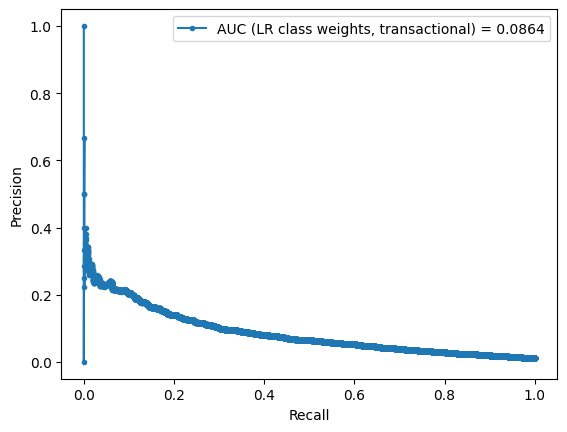

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
y_valid =  y_valid
probabilities = best_logistic_regression.predict_proba(X_valid_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_lr, recall_lr, _ = precision_recall_curve(y_valid, probabilities)
auc_lr = auc(recall_lr, precision_lr)

# Plot the precision-recall curve

plt.plot(recall_lr, precision_lr, marker=".", label=f"AUC (LR class weights, transactional) = {auc_lr:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
class_report = classification_report(y_valid, y_pred_cw)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

Class 0: F1 Score = 0.99
Class 1: F1 Score = 0.00
Class accuracy: F1 Score = 0.99
Class macro: F1 Score = 0.50
Class weighted: F1 Score = 0.98


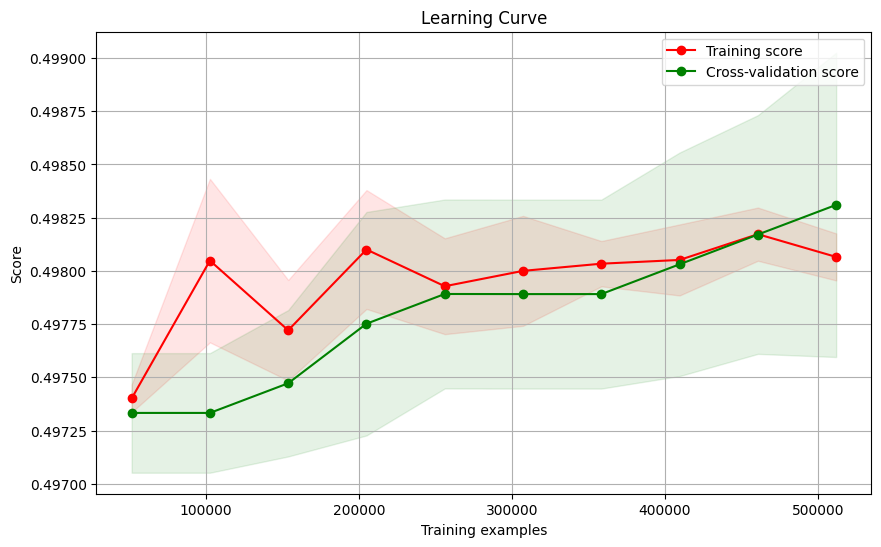

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression, X_train_transformed, y_train_transformed, scoring, train_sizes)

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_logsitc_regression.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-19-76b0229c3f0c>", line 4, in <cell line: 4>
    y_prob = best_logsitc_regression.predict_proba(X_valid_transformed)[:, 1]
NameError: name 'best_logsitc_regression' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'NameError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_of

In [ ]:
#save model to a file
joblib.dump(best_logistic_regression, 'log_reg_smote_trans.pkl')

In [ ]:
### best sampling + CW + TR
#no (new) data import needed - work on the last one

In [ ]:
#calc the weight for the positive class
#inv of the proportion of positive cases in the dataset
weight_positive = 1 / 0.011  # 1/0.011 = 90.91

#set the class weights
class_weights = {0: 1, 1: weight_positive}
logistic_regression = LogisticRegression(class_weight=class_weights, max_iter=1000, warm_start=True)


#hyperparameters and their possible values
param_grid = {
    'penalty': ['l2', 'l1'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [400, 500, 600, 700, 800, 1000],
}

#RandomizedSearchCV object
random_search = RandomizedSearchCV(
    logistic_regression, param_grid, cv=5, scoring='f1', n_iter=10, random_state=42
)

#fit the random search to the data
random_search.fit(X_train_resampled, y_train_resampled)

#get the best hyperparameters
best_params = random_search.best_params_

print("Best Hyperparameters LR SMOTE w/ class weights:", best_params)

#create a logistic regression model with the best hyperparameters
best_logistic_regression_cw = LogisticRegression(**best_params)

#fit the model to the training data
best_logistic_regression_cw.fit(X_train_resampled, y_train_resampled)

#predictions on the test data
y_pred_cw = best_logistic_regression_cw.predict(X_valid_transformed)

In [ ]:
#save model to a file
joblib.dump(best_logistic_regression, 'log_reg_smote_class_weights_trans.pkl')

In [ ]:
f1 = f1_score(y_valid, y_pred_cw, average = "macro")
print(f"F1 Score: {f1:.4f}")


In [ ]:
f1 = f1_score(y_valid, y_pred_cw, average = "weighted")
print(f"F1 Score: {f1:.4f}")


In [ ]:
##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_valid, y_pred_cw))

print("\nClassification Report:")
print(classification_report(y_valid, y_pred_cw))

In [ ]:
precision, recall, _ = precision_recall_curve(y_valid, best_model.predict_proba(X_valid_transformed)[:, 1])
auc_score = auc(recall, precision)

# Plot the precision-recall curve
plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(f'Precision-Recall Curve LR smote TR + CW (AUC = {auc_score:.2f})')
plt.show()

print(f"Area Under the Curve LR smote TR + CW (AUC): {auc_score:.4f}")

In [ ]:
average_precision = average_precision_score(y_valid, y_pred)
print(f'Area Under the Precision-Recall Curve (AUC-PR): {average_precision:.4f}')

In [ ]:
class_report = classification_report(y_valid, y_pred)

# Print F1 scores per class
for line in class_report.split('\n')[2:-1]:
    row = line.split()
    if len(row) > 1:
        class_label = row[0]
        f1 = float(row[-2])
        print(f"Class {class_label}: F1 Score = {f1:.2f}")

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)
scoring = "f1_macro"
plot_learning_curve(best_logistic_regression, X_train_resampled, y_train_resampled, scoring, train_sizes)

In [ ]:
##custom scorer

#obtain predicted probabilities for the positive class from the model
y_prob = best_model.predict_proba(X_valid_transformed)[:, 1]

#make a list of touples with predicted probabilities and true labels in descending order
sorted_probs = sorted(zip(y_prob, y_valid), key=lambda x: x[0], reverse=True)

#calculate cumulative sum of true positives
cumulative_tp = [0] + list(np.cumsum([y == 1 for _, y in sorted_probs]))

#find the threshold where cumulative TP is closest to 90%
target_cumulative_tp = int(0.9 * cumulative_tp[-1])
threshold = next(prob for prob, _ in sorted_probs if cumulative_tp[np.searchsorted(cumulative_tp, target_cumulative_tp)] >= target_cumulative_tp) #find the threshold value where the cumulative TP is the closest to the target cumulative TP

#applu the threshold to classify positive and negative instances
y_pred = (y_prob >= threshold).astype(int) #astype to convert booleans to 0 and 1

#evaluate the model using the chosen threshold
conf_matrix = confusion_matrix(y_valid, y_pred)
fpr = conf_matrix[0, 1] / (conf_matrix[0, 1] + conf_matrix[0, 0])
recall = recall_score(y_valid, y_pred)

print(f"Chosen threshold: {threshold}")
print(f"False Positive Rate: {fpr}")
print(f"Recall: {recall}")
print(conf_matrix)

In [11]:
###out-of-sample generalization: best model making predictions on the test set
X_test_transformed = pd.read_csv('X_test_transformed_basicfull.csv')
y_test = pd.read_csv('y_test_basicfull.csv')
y_test = np.ravel(y_test.values)
##load model
best_logistic_regression = joblib.load('log_reg_class_weights.pkl')
##y_pred

In [12]:
y_pred = best_logistic_regression.predict(X_test_transformed)

In [14]:
f1 = f1_score(y_test, y_pred, average = "macro")
print(f"F1 Score: {f1:.4f}")

f1 = f1_score(y_test, y_pred, average = "weighted")
print(f"F1 Score: {f1:.4f}")

##confusion matrix & classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

F1 Score: 0.5093
F1 Score: 0.9838
Confusion Matrix:
[[197782     12]
 [  2179     27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197794
           1       0.69      0.01      0.02      2206

    accuracy                           0.99    200000
   macro avg       0.84      0.51      0.51    200000
weighted avg       0.99      0.99      0.98    200000



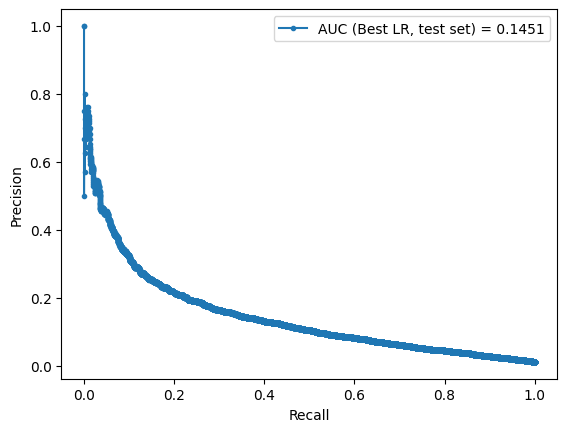

In [15]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming y_valid and probabilities are available
#y_valid =  y_valid
probabilities = best_logistic_regression.predict_proba(X_test_transformed)[:, 1]  # Probabilities of the positive class

# Calculate the "No Skill" precision

# Calculate precision-recall pairs
precision_dt, recall_dt, _ = precision_recall_curve(y_test, probabilities)
auc_dt = auc(recall_dt, precision_dt)

# Plot the precision-recall curve

plt.plot(recall_dt, precision_dt, marker=".", label=f"AUC (Best LR, test set) = {auc_dt:.4f}")

# Axis labels
plt.xlabel("Recall")
plt.ylabel("Precision")

# Show the legend
plt.legend()

# Show the plot
plt.show()
